## Metrics: Precision, Recall, Specificity, F1, PRAUC, AUROC

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, roc_curve,
    accuracy_score, f1_score, roc_auc_score,
    average_precision_score, confusion_matrix,
    precision_recall_curve
)

In [2]:
# use api key to download data
api = KaggleApi()
api.authenticate()

dataset_path = 'uciml/pima-indians-diabetes-database'
file_name = 'diabetes.csv'

if not os.path.exists(file_name): 
    api.dataset_download_file(dataset_path, file_name, path='./')

In [3]:
df = pd.read_csv(file_name)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
# separate features from response
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
# split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# predict on the test set and get the probas
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

In [9]:
# quickly look at the distribution of the probas
percentiles = np.percentile(y_pred_proba, [5, 25, 50, 75, 95])
percentiles

array([0.03455916, 0.11988391, 0.29950891, 0.64771925, 0.87080576])

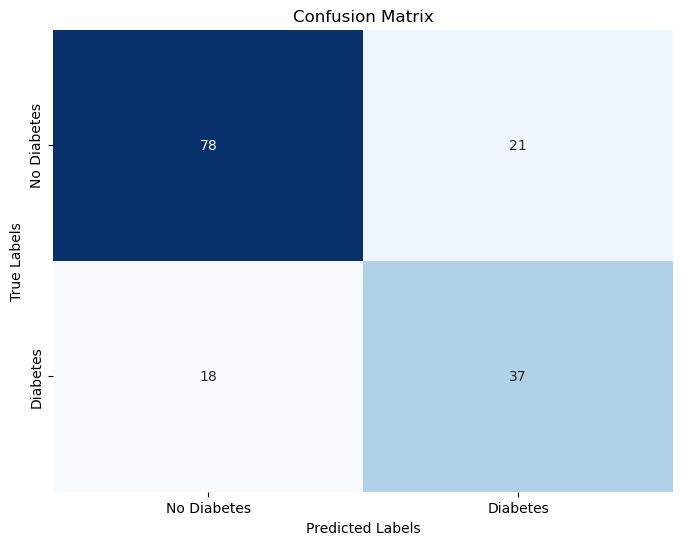

In [10]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'], va='center')
plt.show()

In [11]:
# recall / sensitivity
recall = recall_score(y_test, y_pred)
recall

0.6727272727272727

In [12]:
# precision / positive predictive value
precision = precision_score(y_test, y_pred)
precision

0.6379310344827587

In [13]:
# specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
specificity

0.7878787878787878

In [14]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7467532467532467

In [15]:
# f1
f1 = f1_score(y_test, y_pred)
f1

0.6548672566371682

In [16]:
# get ROC curve values
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)

# get PR curve values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

# get areas under the curves
auroc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

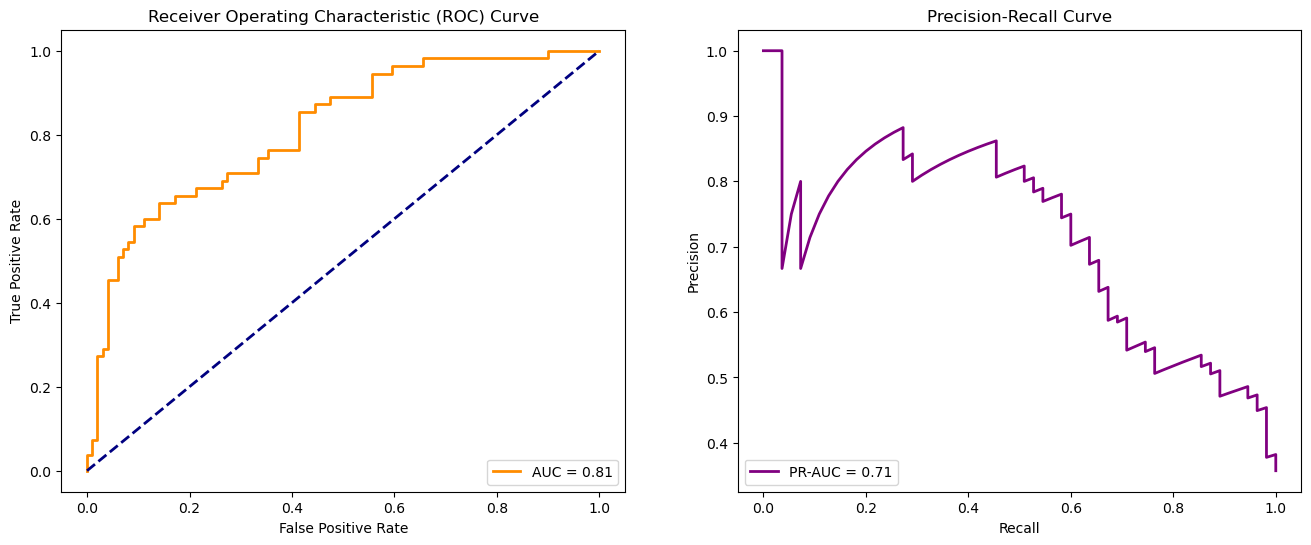

In [17]:
# plot both curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auroc:.2f}')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot Precision-Recall Curve
ax2.plot(recall, precision, color='purple', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")

plt.show()

In [18]:
y_test.value_counts()

Outcome
0    99
1    55
Name: count, dtype: int64